### NATURAL LANGUAGE PROCESSING USING DISASTER AND TWEETS

### Required library


In [1]:
import pandas as pd
import re
from string import punctuation
import nltk
from nltk.corpus import stopwords
import string
string.punctuation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [2]:
train_df = pd.read_csv(r"train.csv")
test_df = pd.read_csv(r"test.csv")


### explore data

In [3]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [5]:
train_df.shape

(7613, 5)

In [6]:
test_df.shape

(3263, 4)

In [7]:
train_df.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

In [8]:
test_df.dtypes

id           int64
keyword     object
location    object
text        object
dtype: object

In [9]:
train_df.value_counts

<bound method DataFrame.value_counts of          id keyword location  \
0         1     NaN      NaN   
1         4     NaN      NaN   
2         5     NaN      NaN   
3         6     NaN      NaN   
4         7     NaN      NaN   
...     ...     ...      ...   
7608  10869     NaN      NaN   
7609  10870     NaN      NaN   
7610  10871     NaN      NaN   
7611  10872     NaN      NaN   
7612  10873     NaN      NaN   

                                                   text  target  
0     Our Deeds are the Reason of this #earthquake M...       1  
1                Forest fire near La Ronge Sask. Canada       1  
2     All residents asked to 'shelter in place' are ...       1  
3     13,000 people receive #wildfires evacuation or...       1  
4     Just got sent this photo from Ruby #Alaska as ...       1  
...                                                 ...     ...  
7608  Two giant cranes holding a bridge collapse int...       1  
7609  @aria_ahrary @TheTawniest The out of cont

In [10]:
test_df.value_counts

<bound method DataFrame.value_counts of          id keyword location  \
0         0     NaN      NaN   
1         2     NaN      NaN   
2         3     NaN      NaN   
3         9     NaN      NaN   
4        11     NaN      NaN   
...     ...     ...      ...   
3258  10861     NaN      NaN   
3259  10865     NaN      NaN   
3260  10868     NaN      NaN   
3261  10874     NaN      NaN   
3262  10875     NaN      NaN   

                                                   text  
0                    Just happened a terrible car crash  
1     Heard about #earthquake is different cities, s...  
2     there is a forest fire at spot pond, geese are...  
3              Apocalypse lighting. #Spokane #wildfires  
4         Typhoon Soudelor kills 28 in China and Taiwan  
...                                                 ...  
3258  EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...  
3259  Storm in RI worse than last hurricane. My city...  
3260  Green Line derailment in Chicago http://t.co/U.

In [11]:
train_df.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [12]:
test_df.describe()

,id
count,3263.000000
mean,5427.152927
std,3146.427221
min,0.000000
25%,2683.000000
50%,5500.000000
75%,8176.000000
max,10875.000000


 ### visualization

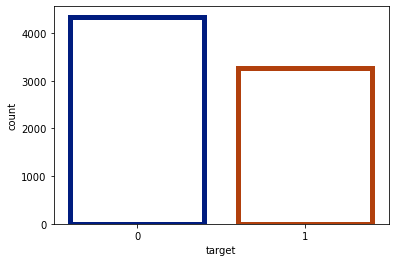

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
a = sns.countplot(x="target", data= train_df,facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("dark", 3))
plt.show()

### Pre-processing & EDA


In [14]:
train_df.isnull()


,id,keyword,location,text,target
0,False,True,True,False,False
1,False,True,True,False,False
2,False,True,True,False,False
3,False,True,True,False,False
4,False,True,True,False,False
...,...,...,...,...,...
7608,False,True,True,False,False
7609,False,True,True,False,False
7610,False,True,True,False,False
7611,False,True,True,False,False


In [15]:
test_df.isnull()


,id,keyword,location,text
0,False,True,True,False
1,False,True,True,False
2,False,True,True,False
3,False,True,True,False
4,False,True,True,False
...,...,...,...,...
3258,False,True,True,False
3259,False,True,True,False
3260,False,True,True,False
3261,False,True,True,False


In [16]:
train_df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [17]:
test_df.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

In [18]:
# drop the null values columns
train_df.drop(['keyword','location','id'], axis = 1, inplace = True)
# drop the null values columns
test_df.drop(['keyword','location','id'], axis = 1, inplace = True)


# again check null values

In [19]:
train_df.isnull().sum()

text      0
target    0
dtype: int64

In [20]:
test_df.isnull().sum()

text    0
dtype: int64

In [21]:
train_df.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [22]:
test_df.head()

,text
0,Just happened a terrible car crash
1,"Heard about #earthquake is different cities, s..."
2,"there is a forest fire at spot pond, geese are..."
3,Apocalypse lighting. #Spokane #wildfires
4,Typhoon Soudelor kills 28 in China and Taiwan


### cleaning data

## Remove punctuation

In [23]:
def clean_text(text):
    nopunc = ''.join([char for char in text if char not in string.punctuation])
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
train_df['clean_text'] = train_df['text'].apply(lambda x : clean_text(x))
test_df['clean_text'] = test_df['text'].apply(lambda x : clean_text(x))
train_df.head()

,text,target,clean_text
0,Our Deeds are the Reason of this #earthquake M...,1,"[Deeds, Reason, earthquake, May, ALLAH, Forgiv..."
1,Forest fire near La Ronge Sask. Canada,1,"[Forest, fire, near, La, Ronge, Sask, Canada]"
2,All residents asked to 'shelter in place' are ...,1,"[residents, asked, shelter, place, notified, o..."
3,"13,000 people receive #wildfires evacuation or...",1,"[13000, people, receive, wildfires, evacuation..."
4,Just got sent this photo from Ruby #Alaska as ...,1,"[got, sent, photo, Ruby, Alaska, smoke, wildfi..."


## Stemming: 

In [24]:
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()
train_df['stemmed'] = train_df['clean_text'].apply(lambda x: [porter_stemmer.stem(y) for y in x])
test_df['stemmed'] = test_df['clean_text'].apply(lambda x: [porter_stemmer.stem(y) for y in x])
train_df.head()

,text,target,clean_text,stemmed
0,Our Deeds are the Reason of this #earthquake M...,1,"[Deeds, Reason, earthquake, May, ALLAH, Forgiv...","[deed, reason, earthquak, may, allah, forgiv, us]"
1,Forest fire near La Ronge Sask. Canada,1,"[Forest, fire, near, La, Ronge, Sask, Canada]","[forest, fire, near, la, rong, sask, canada]"
2,All residents asked to 'shelter in place' are ...,1,"[residents, asked, shelter, place, notified, o...","[resid, ask, shelter, place, notifi, offic, ev..."
3,"13,000 people receive #wildfires evacuation or...",1,"[13000, people, receive, wildfires, evacuation...","[13000, peopl, receiv, wildfir, evacu, order, ..."
4,Just got sent this photo from Ruby #Alaska as ...,1,"[got, sent, photo, Ruby, Alaska, smoke, wildfi...","[got, sent, photo, rubi, alaska, smoke, wildfi..."


## Lemmatization: 

In [25]:
from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()
train_df['lemma'] = train_df['clean_text'].apply(lambda x: [wordnet_lemmatizer.lemmatize(y) for y in x])
test_df['lemma'] = test_df['clean_text'].apply(lambda x: [wordnet_lemmatizer.lemmatize(y) for y in x])

train_df.head()


,text,target,clean_text,stemmed,lemma
0,Our Deeds are the Reason of this #earthquake M...,1,"[Deeds, Reason, earthquake, May, ALLAH, Forgiv...","[deed, reason, earthquak, may, allah, forgiv, us]","[Deeds, Reason, earthquake, May, ALLAH, Forgiv..."
1,Forest fire near La Ronge Sask. Canada,1,"[Forest, fire, near, La, Ronge, Sask, Canada]","[forest, fire, near, la, rong, sask, canada]","[Forest, fire, near, La, Ronge, Sask, Canada]"
2,All residents asked to 'shelter in place' are ...,1,"[residents, asked, shelter, place, notified, o...","[resid, ask, shelter, place, notifi, offic, ev...","[resident, asked, shelter, place, notified, of..."
3,"13,000 people receive #wildfires evacuation or...",1,"[13000, people, receive, wildfires, evacuation...","[13000, peopl, receiv, wildfir, evacu, order, ...","[13000, people, receive, wildfire, evacuation,..."
4,Just got sent this photo from Ruby #Alaska as ...,1,"[got, sent, photo, Ruby, Alaska, smoke, wildfi...","[got, sent, photo, rubi, alaska, smoke, wildfi...","[got, sent, photo, Ruby, Alaska, smoke, wildfi..."


### splitting

In [26]:


# Extracting X matrix and y vector
X = train_df["text"].to_numpy()
y = train_df["target"].to_numpy()

# splitting the data set into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

len(X_train), len(X_test), len(y_train), len(y_test)


(6090, 1523, 6090, 1523)

### Text Normalization Using TfidfVectorizer

In [27]:

vectorizer = TfidfVectorizer(use_idf=True, analyzer=clean_text, ngram_range=(1,3), min_df=1, stop_words='english')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
test_texts = vectorizer.transform(test_df["text"])

### Model Building

In [28]:
from sklearn.svm import SVC
class_svc = SVC()
class_svc.fit(X_train, y_train)

SVC()

In [29]:
y_pred_svc = class_svc.predict(X_test)
y_pred_svc

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [30]:
from sklearn.metrics import classification_report, plot_confusion_matrix

### CONFUSION MATRIX

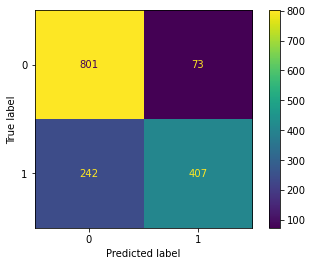

In [31]:
plot_confusion_matrix(class_svc, X_test, y_test)
plt.show()

### CLASSIFICATION REPORT

In [32]:
# printing classification_report
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       874
           1       0.85      0.63      0.72       649

    accuracy                           0.79      1523
   macro avg       0.81      0.77      0.78      1523
weighted avg       0.80      0.79      0.79      1523

